# Understanding Descriptive Statistics

Import the necessary libraries here:

In [3]:
# Libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [4]:
# your code here
def dice(n):
    lst=[]
    for i in range(n):
        total = 0
        total += random.randint(1, 6)
        lst.append(total)
    return lst

d={'throw':range(1,11),'value':dice(10)}
new_list=dice(10)
data=pd.DataFrame(d)
data

,throw,value
0,1,2
1,2,2
2,3,1
3,4,4
4,5,4
5,6,5
6,7,3
7,8,3
8,9,1
9,10,2


#### 2.- Plot the results sorted by value.

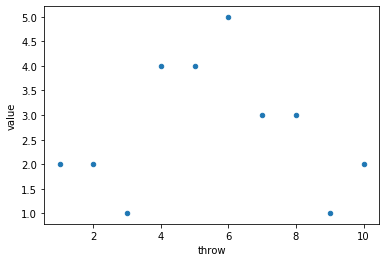

In [5]:
# your code here
data.plot.scatter('throw','value')

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [6]:
# your code here
data_freq=data.groupby('value').count().reset_index()
data_freq

#data_freq.plot.scatter('value','throw')

,value,throw
0,1,2
1,2,3
2,3,2
3,4,2
4,5,1


In [7]:
"""
The first one contains all the results from throwing dice, the second one contains the accumulated number of throws for each result.
"""

'\nThe first one contains all the results from throwing dice, the second one contains the accumulated number of throws for each result.\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
# your code here
def calc_mean(lst):
    total=0
    for value in lst:
        total+=value
    return (total/len(lst))

calc_mean(dice(10))

3.9

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [9]:
# your code here
def calc_freq(lst):  
    freq = {} 
    for item in lst: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1
    return freq

calc_freq(dice(10))
calc_mean(list(calc_freq(dice(10)).values()))

2.0

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [10]:
# your code here
def calc_median(lst):
    lst.sort()
    n=len(lst)
    if n%2==0:
        median1 = lst[n//2] 
        median2 = lst[n//2 - 1] 
        median = (median1 + median2)/2
    else: 
        median = lst[n//2]
    return median
    
calc_median(dice(10))    

3.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [11]:
# your code here
def calc_quartile(lst):
    n=len(lst)
    if n%2==0:
        q1=round((1/4)*(n+1))
        q3=round((3/4)*(n+1))
        q2=calc_median(lst)
        return [min(lst),lst[q1-1]],[lst[q1-1],q2],[q2,lst[q3-1]],[lst[q3-1],max(lst)]
    else:
        q1=round((1/4)*(n+1))
        q3=round((3/4)*(n+1))
        q2=calc_median(lst)
        return [min(lst),(lst[q1]+lst[q1-1])/2],[(lst[q1]+lst[q1-1])/2,q2],[q2,(lst[q3-1]+lst[q3-2])/2],[(lst[q3-1]+lst[q3-2])/2,max(lst)]

calc_quartile([12,16,17,18,18,21,22,26,27,27])
    


([12, 17], [17, 19.5], [19.5, 26], [26, 27])

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

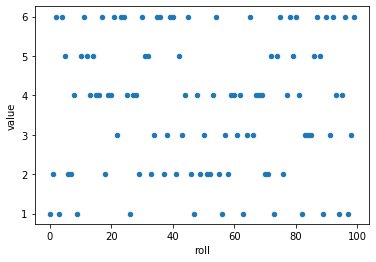

In [12]:
# your code here
data=pd.read_csv('C:/Users/Tdias/Documents/GitHub/lab-understanding-descriptive-stats/data/roll_the_dice_hundred.csv',index_col=[0])
data.sort_values(by='value').plot.scatter('roll','value')

In [13]:
"""
From [80-100] throws, value 2 didn't came out once. From [0-20] throws, value 3 didn't come out once. From [40-65], value 5
didn't come out once as well. Value 6 and Value 4 are distributed all allong the 100 throws, and look that the most frequent events.
"""

"\nFrom [80-100] throws, value 2 didn't came out once. From [0-20] throws, value 3 didn't come out once. From [40-65], value 5\ndidn't come out once as well. Value 6 and Value 4 are distributed all allong the 100 throws, and look that the most frequent events.\n"

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [14]:
# your code here
mean=calc_mean(data['value'])
mean

3.74

In [15]:
median=calc_median(data.value.to_list())
median

4.0

#### 3.- Now, calculate the frequency distribution.


In [16]:
# your code here
freq=calc_freq(data['value'])
freq

{1: 12, 2: 17, 6: 23, 5: 12, 4: 22, 3: 14}

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

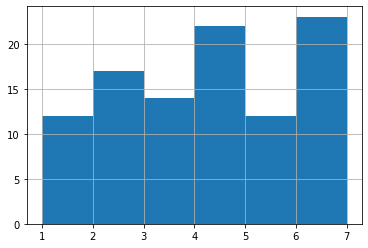

In [17]:
# your code here
data['value'].hist(bins=6,range=(1,7))

In [18]:
"""
Regarding the shape, it seems like a skewed left distribuition. The values with higher frequency are 4 and 6. The mean gets pulled toward the tail, and is less than the median(4).
Fewer data plots are found to the left of the graph (toward the smaller numeric values). 
The "tail" of the graph is pulled toward the lower numbers, or to the left. The mean typically gets pulled toward the tail, and is less than the median.
"""

'\nRegarding the shape, it seems like a skewed left distribuition. The values with higher frequency are 4 and 6. The mean gets pulled toward the tail, and is less than the median(4).\nFewer data plots are found to the left of the graph (toward the smaller numeric values). \nThe "tail" of the graph is pulled toward the lower numbers, or to the left. The mean typically gets pulled toward the tail, and is less than the median.\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

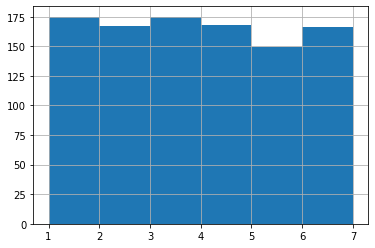

In [19]:
# your code here
data1=pd.read_csv('C:/Users/Tdias/Documents/GitHub/lab-understanding-descriptive-stats/data/roll_the_dice_thousand.csv',index_col=[0])
data1['value'].hist(bins=6,range=(1,7))

In [20]:
"""
The shape became uniform. The data is almost spread equally across the range.
There are no clear peaks in these graphs, since each data entry appears the same number of times in the set.
"""

'\nThe shape became uniform. The data is almost spread equally across the range.\nThere are no clear peaks in these graphs, since each data entry appears the same number of times in the set.\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [21]:
# your code here
data=pd.read_csv('C:/Users/Tdias/Documents/GitHub/lab-understanding-descriptive-stats/data/ages_population.csv')
data

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


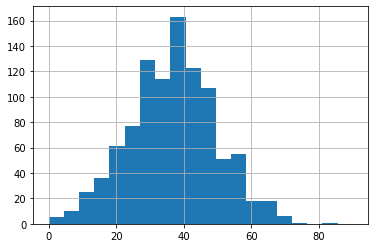

In [22]:
freq=calc_freq(data['observation'])
data['observation'].hist(bins=20,range=(0,90))

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [23]:
# your code here
mean=data['observation'].mean()
stdeviation=data['observation'].std()
mean,stdeviation

(36.56, 12.81649962597677)

In [24]:
"""
The histogram shows a symmetric shape. The mean is where I expected it to be, really close to the center of the shape - close to
40 years old. Regarding the standard deviation, I was expecting that most of the values would be between 28 and 48. My guess was close
but not accurate, since most of the ages fall between 23 and 49.
"""

'\nThe histogram shows a symmetric shape. The mean is where I expected it to be, really close to the center of the shape - close to\n40 years old. Regarding the standard deviation, I was expecting that most of the values would be between 28 and 48. My guess was close\nbut not accurate, since most of the ages fall between 23 and 49.\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [25]:
# your code here
data=pd.read_csv('C:/Users/Tdias/Documents/GitHub/lab-understanding-descriptive-stats/data/ages_population2.csv')
data

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0
...,...
995,26.0
996,22.0
997,21.0
998,19.0


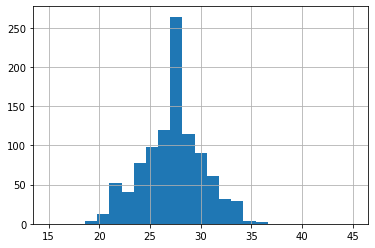

In [26]:
freq=calc_freq(data['observation'])
data['observation'].hist(bins=25,range=(15,45))

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [27]:
"""
The shape is also symmetric. But there is a higher concentration of values in the middle of the shape. The frequency is mostly
between ages 25 and 30 and the mean should be between this values, close to the median. There is no frequency for ages superior to 50
and inferior to 15.
"""

'\nThe shape is also symmetric. But there is a higher concentration of values in the middle of the shape. The frequency is mostly\nbetween ages 25 and 30 and the mean should be between this values, close to the median. There is no frequency for ages superior to 50\nand inferior to 15.\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [28]:
# your code here
mean=data['observation'].mean()
stdeviation=data['observation'].std()
mean,stdeviation

(27.155, 2.9698139326891835)

In [29]:
"""
As expected, the median is significantly lower, since there are no ages inferior to 15 and superior to 50. The frequency on ages
between 25 and 30 is so high, that I was expecting the mean to be around that area. Regarding the standard deviation, my expectation
was quite accurate, since the real stdev is between 24 and 30.
"""

'\nAs expected, the median is significantly lower, since there are no ages inferior to 15 and superior to 50. The frequency on ages\nbetween 25 and 30 is so high, that I was expecting the mean to be around that area. Regarding the standard deviation, my expectation\nwas quite accurate, since the real stdev is between 24 and 30.\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [30]:
# your code here
data=pd.read_csv('C:/Users/Tdias/Documents/GitHub/lab-understanding-descriptive-stats/data/ages_population3.csv')
data

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0
...,...
995,16.0
996,55.0
997,30.0
998,35.0


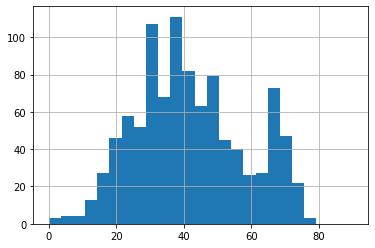

In [31]:
data['observation'].hist(bins=25,range=(0,90))

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [32]:
# your code here
mean=data['observation'].mean()
stdeviation=data['observation'].std()
mean,stdeviation

(41.989, 16.14470595986593)

In [33]:
"""
Due to a high frequency on ages between 68-75 on the right far part of the shape, 
the value for the mean is higher on this situation. Similarly. the stdeviation
has also increased.
"""

'\nDue to a high frequency on ages between 68-75 on the right far part of the shape, \nthe value for the mean is higher on this situation. Similarly. the stdeviation\nhas also increased.\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [34]:
median=data['observation'].median()
median

40.0

In [35]:
# your code here
pd.qcut(data['observation'],q=4)

0      (0.999, 30.0]
1      (0.999, 30.0]
2      (0.999, 30.0]
3       (30.0, 40.0]
4       (53.0, 77.0]
           ...      
995    (0.999, 30.0]
996     (53.0, 77.0]
997    (0.999, 30.0]
998     (30.0, 40.0]
999     (40.0, 53.0]
Name: observation, Length: 1000, dtype: category
Categories (4, interval[float64]): [(0.999, 30.0] < (30.0, 40.0] < (40.0, 53.0] < (53.0, 77.0]]

In [36]:
"""
The median and the mean are very close, but still, the mean is higher. Probabaly, due to the high frequency registered in ages
>60 and <77.
Considering  the quartiles, we can consider values from before the first quartile
and values after the third quartile as outliers. This leaves us the values between 30 and 53. In fact, the median 
and the mean are right on the middle of this interval.
"""

'\nThe median and the mean are very close, but still, the mean is higher. Probabaly, due to the high frequency registered in ages\n>60 and <77.\nConsidering  the quartiles, we can consider values from before the first quartile\nand values after the third quartile as outliers. This leaves us the values between 30 and 53. In fact, the median \nand the mean are right on the middle of this interval.\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [37]:
# your code here
q10 = data.quantile(0.1)
q20 = data.quantile(0.2)
q30 = data.quantile(0.3)
q40 = data.quantile(0.4)

q60 = data.quantile(0.6)
q70 = data.quantile(0.7)
q80 = data.quantile(0.8)
q90 = data.quantile(0.9)

print(q10,q20,q30,q40,q60,q70,q80,q90)

observation    22.0
Name: 0.1, dtype: float64 observation    28.0
Name: 0.2, dtype: float64 observation    32.0
Name: 0.3, dtype: float64 observation    36.0
Name: 0.4, dtype: float64 observation    45.0
Name: 0.6, dtype: float64 observation    50.0
Name: 0.7, dtype: float64 observation    57.0
Name: 0.8, dtype: float64 observation    67.0
Name: 0.9, dtype: float64


In [ ]:
"""
Calculating the percentiles we can see that there is no much difference on the gap between the middle ones and the right ones,
indicating that the distribution is skewed right.
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here


In [ ]:
"""
your comments here
"""